In [1]:
# Install PyPDF2
!pip install PyPDF2

# Install py-readability-metrics
!pip install py-readability-metrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.6 MB/s eta 0:00:00a 0:00:01


In [21]:
# Import NLTK
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brendanbrady/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendanbrady/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/brendanbrady/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Article 1: The first news article reports on Harvard University President Claudine Gay facing over 40 plagiarism allegations. The Washington Free Beacon independently verified the claims, revealing a pattern of misconduct. Despite the controversy, Harvard Corporation stood by Gay's leadership, acknowledging inadequate citation instances. The article includes perspectives from the complainant, the Free Beacon, and NAACP President Derrick Johnson, providing a mix of information. However, readers should be mindful of potential bias from the news outlet and consider consulting multiple sources for a comprehensive view.

Article 2: The second new article reports that Harvard University President Claudine Gay plans to submit three corrections to her 1997 dissertation following plagiarism allegations. The university spokesperson stated that a committee investigating the allegations found citation errors but concluded that Gay's work fell short of research misconduct. Gay has already corrected two published articles, and the additional corrections are related to her Ph.D. dissertation. The article mentions the pressure on Gay to resign, especially after her congressional testimony about antisemitism. The report includes information about the investigation, the nature of the corrections, and the context of the controversy surrounding Gay's presidency.

In [59]:
import PyPDF2

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_file):
    text = ""
    with open(pdf_file, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
                page = reader.pages[page_num]
                text += reader.pages[page_num].extract_text()
    return text

foxnews = extract_text_from_pdf('Harvard1stArticle.pdf')
reuters = extract_text_from_pdf('Harvard2ndArticle.pdf')

print("Text from the first article:")
print(foxnews)

print("\nText from the second article:")
print(reuters)


Text from the first article:
1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the H

In [68]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


first_article_sentiment = analyze_sentiment(first_article_text)
second_article_sentiment = analyze_sentiment(second_article_text)

print("Sentiment analysis for the first article:", first_article_sentiment)
print("Sentiment analysis for the second article:", second_article_sentiment)
print("I think the first article is more negative than positive, however does have perspectives from both sides. I think the second article is more neutral than anything. I suppose I disagree with the sentiment analysis")


Sentiment analysis for the first article: Positive
Sentiment analysis for the second article: Negative
I think the first article is more negative than positive, however does have perspectives from both sides. I think the second article is more neutral than anything. I suppose I disagree with the sentiment analysis


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/brendanbrady/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
def extract_headlines_from_pdf(pdf_file):
    headlines = []
    with open(pdf_file, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            headlines.append(page.extract_text().split('\n', 1)[0])  # Extract the first line as the headline
    return headlines

first_article_headlines = extract_headlines_from_pdf('Harvard1stArticle.pdf')
second_article_headlines = extract_headlines_from_pdf('Harvard2ndArticle.pdf')

first_article_headlines_sentiment = analyze_sentiment(' '.join(first_article_headlines))
second_article_headlines_sentiment = analyze_sentiment(' '.join(second_article_headlines))

print("Sentiment analysis for the first article headlines:", first_article_headlines_sentiment)
print("Sentiment analysis for the second article headlines:", second_article_headlines_sentiment)
print("The sentiment analysis for the headlines and the article content does not match")


Sentiment analysis for the first article headlines: Negative
Sentiment analysis for the second article headlines: Positive
The sentiment analysis for the headlines and the article content does not match


In [39]:
pip install py-readability-metrics

Note: you may need to restart the kernel to use updated packages.


In [60]:
from readability import Readability

readability1 = Readability(foxnews)
readability2 = Readability(reuters)

flesch1 = readability1.flesch().score
flesch2 = readability2.flesch().score

print("Flesch Reading Ease Score for Fox News Article:", flesch1)
print("Flesch Reading Ease Score for Reuters Article:", flesch2)

Flesch Reading Ease Score for Fox News Article: 21.41115320671068
Flesch Reading Ease Score for Reuters Article: 16.550377619402184


The Flesch Reading Ease score is a measure of how easy or difficult a piece of text is to read.
Here's a general interpretation of Flesch Reading Ease scores:

90-100: Very Easy - Easily understandable by an average 11-year-old student.
80-89: Easy - Understandable by a 13-15-year-old student.
70-79: Fairly Easy - Understandable by a 16-17-year-old student.
60-69: Standard - Understandable by 18-19-year-old students.
50-59: Fairly Difficult - Understandable by college graduates.
30-49: Difficult - Understandable by college students.
0-29: Very Difficult - Best understood by university graduates.

So, we can say, both articles are very difficult to read.

In [62]:
from readability import Readability

readability1 = Readability(foxnews)
readability2 = Readability(reuters)

gunning_fog1 = readability1.gunning_fog().score
gunning_fog2 = readability2.gunning_fog().score

print("Gunning Fog Index for Fox News Article:", gunning_fog1)
print("Gunning Fog Index for Reuters Article:", gunning_fog2)


Gunning Fog Index for Fox News Article: 21.868487077434633
Gunning Fog Index for Reuters Article: 19.59404318689501


The Gunning Fog Index also measure how difficult an article is to read. (different variables than Flesch)
Here's a general interpretation of Gunning Fog Index values:

6 and below: Very easy (for elementary school students)
8-10: Easy (for 6th and 7th graders)
11-12: Fairly easy (for 8th and 9th graders)
13-16: Standard (for high school students)
17-18: Fairly difficult (for college students)
19-20: Difficult (for graduates)
21 and above: Very difficult (for advanced degree holders)

So we can say that the FoxNews article is very difficult (for advanced degree holders) to read, while the Reuters article is considered difficult (for graduates).

In [65]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl (168 kB)
Note: you may need to restart the kernel to use updated packages.


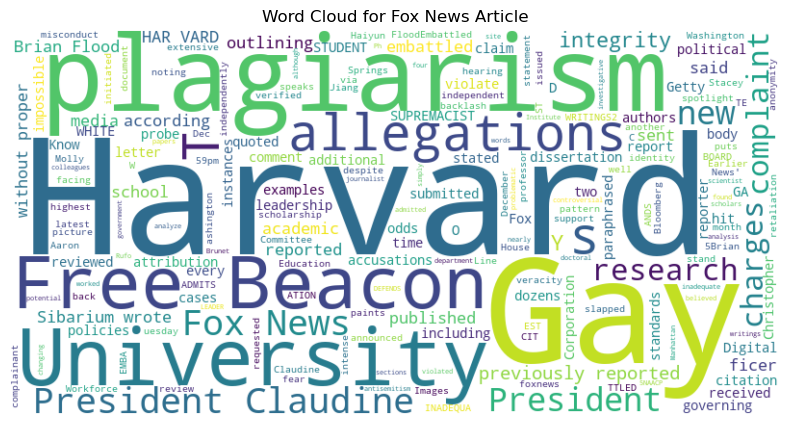

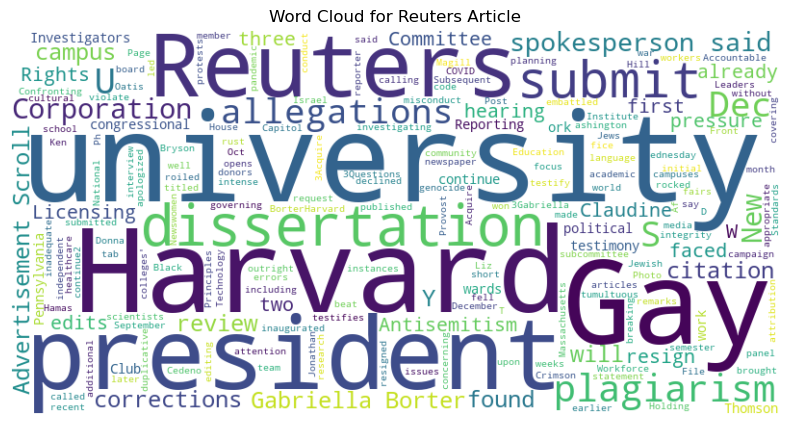

the 2 article word clouds are very similar, with the fox article having more common negative words like allegations and plagiarism. While the second article has more nuetral common words, like Harvard, Submit, President.


In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(foxnews, 'Word Cloud for Fox News Article')
generate_word_cloud(reuters, 'Word Cloud for Reuters Article')
print("the 2 article word clouds are very similar, with the fox article having more common negative words like allegations and plagiarism. While the second article has more nuetral common words, like Harvard, Submit, President.")
